# Temperature Prediction

## Objective
Predict the **temperature** based on humidity data.


## Dataset Overview
The dataset contains hourly or daily readings of humidity and temperature.


## Workflow
1. Load the dataset  
2. Explore and clean the data  
3. Train a regression model  
4. Evaluate predictions


In [28]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


In [8]:
# Load the dataset
df = pd.read_excel(r"C:\Users\pslas\OneDrive\Desktop\humidity.csv.xlsx")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701548 entries, 0 to 701547
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    701548 non-null  int64  
 1   lat          701548 non-null  float64
 2   lon          701548 non-null  float64
 3   pressure     701548 non-null  float64
 4   temperature  701548 non-null  float64
 5   humidity     701548 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 32.1 MB


sensor_id     lat     lon  pressure  temperature  humidity
0       2266  42.738  23.272  95270.27        23.46     62.48
1       2292  42.663  23.273  94355.83        23.06     59.46
2       3096  42.700  23.360  95155.81        26.53     44.38
3       3428  42.624  23.406  94679.57        28.34     38.28
4       3472  42.669  23.318  94327.88        26.31     46.37

## Exploratory Data Analysis


In [11]:
# Display summary statistics

df.describe()

sensor_id            lat            lon       pressure  \
count  701548.000000  701548.000000  701548.000000  701548.000000   
mean     2835.419842      42.679722      23.333739   94965.292500   
std       798.018890       0.025568       0.039365    2577.210945   
min      1764.000000      42.622000      23.240000       0.000000   
25%      2224.000000      42.665000      23.310000   94528.017500   
50%      2323.000000      42.685000      23.332000   95005.480000   
75%      3474.000000      42.694000      23.360000   95405.132500   
max      4661.000000      42.738000      23.419000  164926.750000   

         temperature       humidity  
count  701548.000000  701548.000000  
mean       24.754990      48.348949  
std        14.013001      20.907247  
min      -145.120000       0.000000  
25%        20.630000      34.140000  
50%        24.780000      48.350000  
75%        29.870000      62.940000  
max        61.170000     100.000000

In [12]:
# Check for missing values 
df.isnull().sum()  


sensor_id      0
lat            0
lon            0
pressure       0
temperature    0
humidity       0
dtype: int64

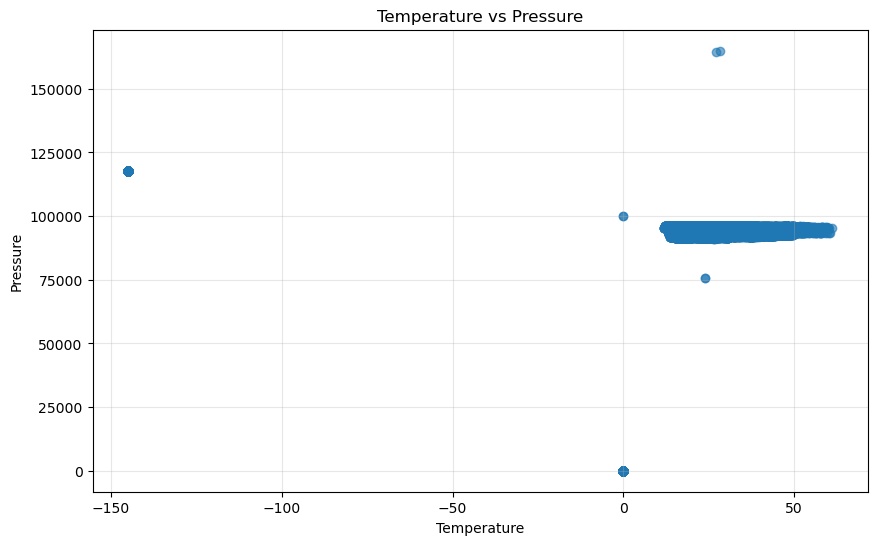

In [13]:
# Scatter plot to observe relationship
# temperature vs pressure
plt.figure(figsize=(10, 6))
plt.scatter(df['temperature'], df['pressure'], alpha=0.6)
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.title('Temperature vs Pressure')
plt.grid(True, alpha=0.3)
plt.show()

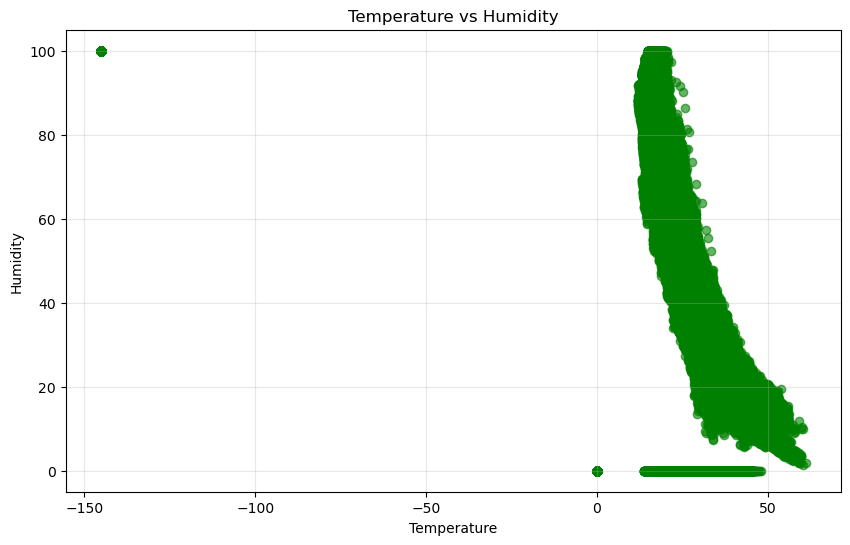

In [14]:
# Temperature vs Humidity
plt.figure(figsize=(10, 6))
plt.scatter(df['temperature'], df['humidity'], alpha=0.6, color='green')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temperature vs Humidity')
plt.grid(True, alpha=0.3)
plt.show()

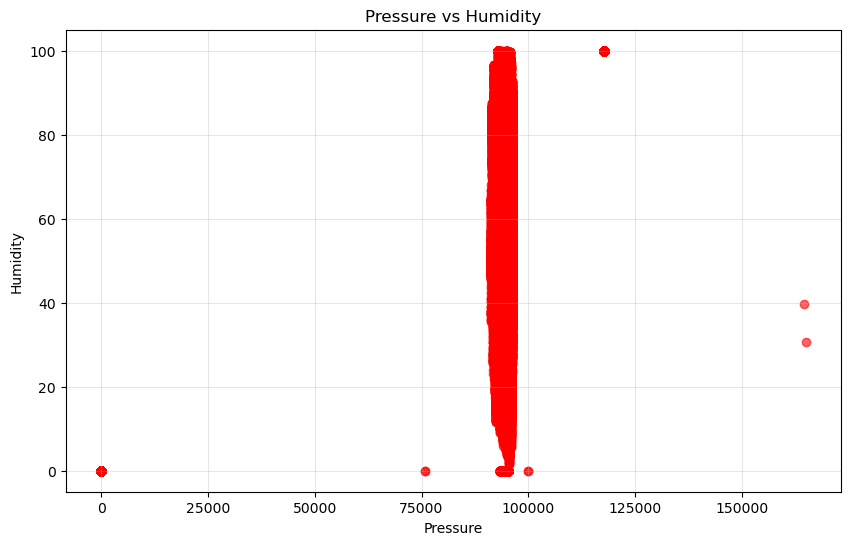

In [15]:
# Pressure vs Humidity
plt.figure(figsize=(10, 6))
plt.scatter(df['pressure'], df['humidity'], alpha=0.6, color='red')
plt.xlabel('Pressure')
plt.ylabel('Humidity')
plt.title('Pressure vs Humidity')
plt.grid(True, alpha=0.3)
plt.show()

## Data Preprocessing

In [18]:
# Drop any rows with missing values
df_cleaned = df.dropna(how='all')

df_cleaned


sensor_id     lat     lon  pressure  temperature  humidity
0            2266  42.738  23.272  95270.27        23.46     62.48
1            2292  42.663  23.273  94355.83        23.06     59.46
2            3096  42.700  23.360  95155.81        26.53     44.38
3            3428  42.624  23.406  94679.57        28.34     38.28
4            3472  42.669  23.318  94327.88        26.31     46.37
...           ...     ...     ...       ...          ...       ...
701543       3558  42.671  23.364  95562.08        21.99     52.28
701544       3836  42.702  23.371  96070.06        21.41     56.84
701545       3296  42.671  23.325  95230.42        22.53     51.72
701546       2234  42.685  23.356  95653.14        23.01     49.78
701547       2232  42.685  23.301  95418.48        22.57     51.44

[701548 rows x 6 columns]

In [23]:
# Define features and target
# Target (temperature)
y = df['temperature']

# Features (drop the target column)
X = df.drop('temperature', axis=1)

print ("Features (X):")
print (X.head)
print ("Features (y):")
print (y.head)


Features (X):
<bound method NDFrame.head of         sensor_id     lat     lon  pressure  humidity
0            2266  42.738  23.272  95270.27     62.48
1            2292  42.663  23.273  94355.83     59.46
2            3096  42.700  23.360  95155.81     44.38
3            3428  42.624  23.406  94679.57     38.28
4            3472  42.669  23.318  94327.88     46.37
...           ...     ...     ...       ...       ...
701543       3558  42.671  23.364  95562.08     52.28
701544       3836  42.702  23.371  96070.06     56.84
701545       3296  42.671  23.325  95230.42     51.72
701546       2234  42.685  23.356  95653.14     49.78
701547       2232  42.685  23.301  95418.48     51.44

[701548 rows x 5 columns]>
Features (y):
<bound method NDFrame.head of 0         23.46
1         23.06
2         26.53
3         28.34
4         26.31
          ...  
701543    21.99
701544    21.41
701545    22.53
701546    23.01
701547    22.57
Name: temperature, Length: 701548, dtype: float64>


In [22]:
# Train-test split(80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (561238, 5)
X_test shape: (140310, 5)
y_train shape: (561238,)
y_test shape: (140310,)


## Model Training

In [33]:
#LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
temp_pred = model.predict(X_test)



## Evaluation


In [32]:
# Assume you already have:
# y_test → actual values
# y_pred → predicted values from the model

# 1. Mean Absolute Error (MAE)
# 2. Mean Squared Error (MSE)
# 3. Root Mean Squared Error (RMSE)
# 4. R² Score (coefficient of determination)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 5.873208380704959e-14
MSE: 5.280167092967654e-27
RMSE: 7.266475825988589e-14
R² Score: 1.0


In [34]:
new_data = [[1001, 13.08, 80.27, 1012.3, 78.5]]  # sensor_id, lat, lon, pressure, humidity
temp_pred = model.predict(new_data)
print("Predicted Temperature:", temp_pred[0])

Predicted Temperature: 78.49999999998494


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Conclusion
- A simple linear regression model was used to predict temperature from humidity.  
- Consider using polynomial regression or time-series models for more complex patterns.
